
######*Syed Zain Raza*
----
##Goal

Your goal in this assigment is to implement a Gaussian **Naive** Bayes Classifier.


There are three different flavours of Bayes Rule

- Binomial Naive Bayes (We saw last time, in case of spam classification)
- Multinomial Naive Bayes
- **Gaussian Naive Bayes**

Now in this part of the assignment we will be implementing the Naive version of Gaussian Bayes Classifier for continuous attributes.

Note that you only need to update the Gaussian Classifier class and the same code your written in the previous assignment will be work as it is.

In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [1]:
## Your code goes here...
# You might need to define auxliary classes for composition.. ?

# **Hint: You can use scipy.stats.multivariate_normal class to build the multi-variage Gaussian
# and then use its pdf member function to calculate the pdf of a given n-dimensional instance**
class GaussianBayes:
    ''' Implements the Gaussian Bayes For Classification... '''
    def __init__(self):
        pass
    def train(self, X, Y):
        ''' Train the multiclass (or Binary) Bayes Rule using the given 
            X [m x d] data matrix and Y labels matrix
            
            Input:
            ------
            X: [m x d] a data matrix of m d-dimensional examples.
            Y: [m x 1] a label vector.
            
            Returns:
            -----------
            Nothing
            '''
        
            ## now go and train a model for each class...
        
    def test(self, X):
        
        ''' Test the trained classifiers on the given set of examples 
        
                   
            Input:
            ------
            X: [m x d] a data matrix of m d-dimensional test examples.
           
            Returns:
            -----------
                pclass: the predicted class for each example, i.e. to which it belongs
                probability: probability of each example falling in to the predicted class...
        '''
        
        nexamples, nfeatures=X.shape
        pclasses=[0]*nexamples
        
        # your code go here...
        
        return np.array(pclasses),prob
    
    def predict(self, X):
        
        """
        Test the trained classifiers on the given example X
        
                   
            Input:
            ------
            X: [1 x d] a d-dimensional test example.
           
            Returns:
            -----------
                pclass: the predicted class for the given example, i.e. to which it belongs
        """
        return self.test(X)[0]            


In [4]:
import pandas as pd

In [5]:
#many important functions are already written and provided in tools.py 
# please have a look at these functions....
import tools as t


In [6]:
data=pd.read_csv('../data/iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
print data.describe()

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   149.000000  149.000000   149.000000  149.000000
mean      5.848322    3.051007     3.774497    1.205369
std       0.828594    0.433499     1.759651    0.761292
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.400000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


#### Get your data in matrix

In [7]:

X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())
print " Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape

 Data Set Dimensions= (149, 4)  True Class labels dimensions (149,)


####Let's Plot the Data

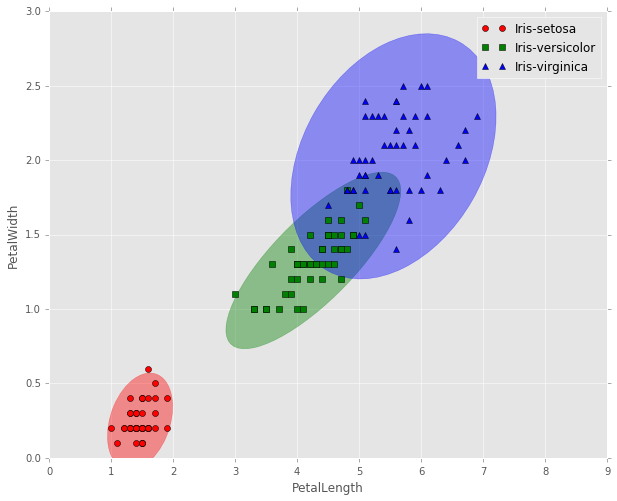

In [8]:
#Lets plot the Complete data, with its covariance matrix...
# Remember seeing is believing
featnames=data.columns
t.plotCov(X[:,2:],Y,labels=featnames.values[2:4])

### Splitting the Data into Training and Testing Sets
There must be a validation set but for this case we are using only two sets, training and validation sets...

In [9]:
# Split your data into training and test-set... 
# see the documentation of split_data in tools for further information...
Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y)

print " Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape   
print " Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytrain.shape   

 Training Data Set Dimensions= (104, 4) Training True Class labels dimensions (104,)
 Test Data Set Dimensions= (45, 4) Test True Class labels dimensions (104,)


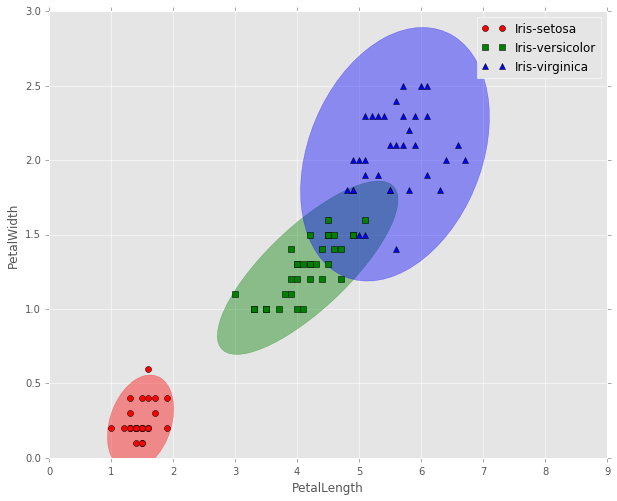

In [10]:
#Lets plot the training data...
t.plotCov(Xtrain[:,2:],Ytrain, labels=featnames.values[2:4])
# so we will be estimating these covariance matrices and means...

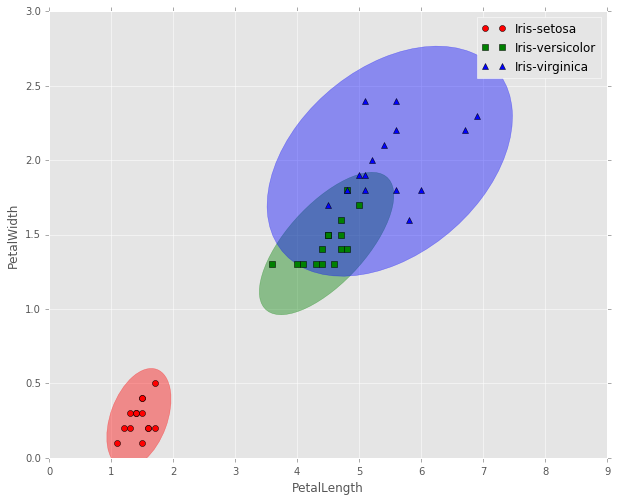

In [11]:
#Lets plot the test data...
t.plotCov(Xtest[:,2:],Ytest,labels=featnames.values[2:4])

Training Time
========
Let's train a Gaussian Bayes, first using two attributes.
- What Two Attributes to use ? Any Guess...

In [24]:
# Lets train a Gaussian Bayes Classifier on Petal Length and Width
gb=GaussianBayes()
gb.train(Xtrain[:,2:],Ytrain)

Training a 3-class Gaussian Bayes Classifier
        
Training a Gaussian Bayes Classifier on 34 Examples of 2
        dimensions on class type Iris-setosa
Training a Gaussian Bayes Classifier on 35 Examples of 2
        dimensions on class type Iris-versicolor
Training a Gaussian Bayes Classifier on 35 Examples of 2
        dimensions on class type Iris-virginica


In [25]:
#Lets test it on the set of unseen examples...
pclasses,res=gb.test(Xtest[:,2:])

Lets see how good we are doing...
==================

In [26]:
#Lets see how good we are doing...
print pclasses==Ytest
print Ytest.shape[0]

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False]
45


In [27]:
# Using Just two attributes, accuracy is 
print np.sum(pclasses==Ytest)
print "Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0])


42
Accuracy =  0.933333333333


 Plotting the Decision Surface of Training Set... 
[0 0 0 ..., 2 2 2] <type 'numpy.int64'> False


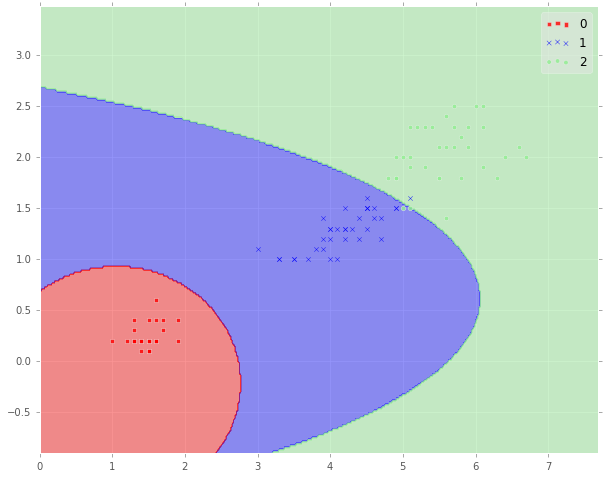

In [28]:
print " Plotting the Decision Surface of Training Set... "
t.plot_decision_regions(Xtrain[:,2:],Ytrain,clf=gb, res=0.02, cycle_marker=True, legend=1)

##Question: What can you conclude from the above decision Region





#K-Fold Cross Validation

Since our dataset is not too big, to ensure that we are reporting true picture of our classifier, 
we will have to cross validate and report the mean accuracy across the folds to reflect the true 
picture of our classifier.

In [29]:
# Now lets cross validate, and test the result...
nfolds=4
folds=t.generate_folds(X,Y,nfolds)

#now lets train and test on these folds...
totacc=[]
for k in range(nfolds):
    gb=GaussianBayes()
    gb.train(folds[k][0][:,2:],folds[k][1])
    pclasses,res=gb.test(folds[k][2][:,2:])
    acc=np.sum(pclasses==folds[k][3])/float(folds[k][3].shape[0])
    print "[Info] Fold {} Accuracy = {}".format(k+1, acc)
    totacc.append(acc)

print totacc, 'Mean Accuracy =', np.mean(totacc)

Generating CV data for 3 classes
Training a 3-class Gaussian Bayes Classifier
        
Training a Gaussian Bayes Classifier on 37 Examples of 2
        dimensions on class type Iris-setosa
Training a Gaussian Bayes Classifier on 38 Examples of 2
        dimensions on class type Iris-versicolor
Training a Gaussian Bayes Classifier on 38 Examples of 2
        dimensions on class type Iris-virginica
[Info] Fold 1 Accuracy = 0.944444444444
Training a 3-class Gaussian Bayes Classifier
        
Training a Gaussian Bayes Classifier on 37 Examples of 2
        dimensions on class type Iris-setosa
Training a Gaussian Bayes Classifier on 38 Examples of 2
        dimensions on class type Iris-versicolor
Training a Gaussian Bayes Classifier on 38 Examples of 2
        dimensions on class type Iris-virginica
[Info] Fold 2 Accuracy = 0.944444444444
Training a 3-class Gaussian Bayes Classifier
        
Training a Gaussian Bayes Classifier on 37 Examples of 2
        dimensions on class type Iris-seto


Hmm Quite Impressive...
--------------------------------

In [30]:
# Lets go and use all the four attributes...
gb.train(Xtrain,Ytrain)

Training a 3-class Gaussian Bayes Classifier
        
Training a Gaussian Bayes Classifier on 34 Examples of 4
        dimensions on class type Iris-setosa
Training a Gaussian Bayes Classifier on 35 Examples of 4
        dimensions on class type Iris-versicolor
Training a Gaussian Bayes Classifier on 35 Examples of 4
        dimensions on class type Iris-virginica


In [33]:
pclasses,res=gb.test(Xtest)

####Do you expect your Test accuracy to increase or decrease ?

In [34]:
# Using all four attributes, accuracy is 
print "Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0])

Accuracy =  0.888888888889


What can you conclude ?
====================

## Let's change the features... 

In [35]:
features=[0, 1]
gb.train(Xtrain[:,features],Ytrain)
pclasses,res=gb.test(Xtest[:,features])
print "Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0])

Training a 3-class Gaussian Bayes Classifier
        
Training a Gaussian Bayes Classifier on 34 Examples of 2
        dimensions on class type Iris-setosa
Training a Gaussian Bayes Classifier on 35 Examples of 2
        dimensions on class type Iris-versicolor
Training a Gaussian Bayes Classifier on 35 Examples of 2
        dimensions on class type Iris-virginica
Accuracy =  0.688888888889


Remember Features are the important !!
======================

[0 0 0 ..., 2 2 2] <type 'numpy.int64'> False


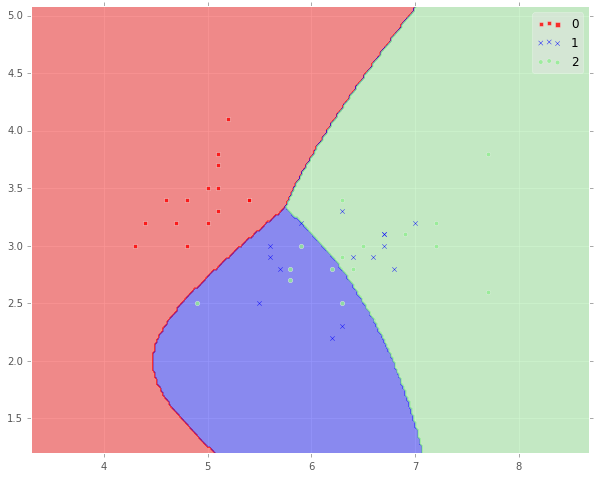

In [36]:
t.plot_decision_regions(Xtest[:,features],Ytest,clf=gb, res=0.02, cycle_marker=True, legend=1)

##Goal: Find the best pair of features (that gives maximum mean cross-validation accuracy) from all the available pairs for the problem in hand

What will you comment on the relative performance of Gaussian Bayes and Gaussian Naive Bayes classifier !!
======================

Write your comments in the following using detailed empirical evidence:
 -
 -
 -